<a href="https://colab.research.google.com/github/beapinol/IRP/blob/main/Nuclear_Power_Station_Suffolk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Research Project GG3209
Student ID - 220002252

GitHub Repository Link - https://github.com/beapinol/IRP

## Introduction

This study is aiming to research whether the construction of a new nuclear power station along the Suffolk Coast, alongside or nearby the already existing Sizewell B Power Station is feasible and suitable considering the risks to coastal flooding and erosion in the area. Sizewell C, a new nuclear power station big enough to aid in meeting the UK’s increasing need for more nuclear power, has already been approved and is estimated to supply 6 million homes with low-carbon supply (Sizewell C., 2024), however its construction’s suitability for the local area has been thrown into question for many reasons (McMenemy et al., 2024). Nuclear energy is reliable in the sense that it does not depend on the weather, of course, but with Sizewell B already receiving strong pushback from environmental groups due to the environmental fragility of ecosystems in the local area, especially in the face of worsening coastal flooding, erosion and eutrophication, it is important to consider whether these factors will affect the reliability of this energy source for the local area and the nation (Sizewell C, 2024; O’Riordan, 1984). There has been lots of local controversy and pushback from local communities in Suffolk regarding the two nuclear stations, even before the second one has been built, noting both the potential damage to fragile local environments, and also the risk of safety on site due to lack of sea-defence and expected rising sea levels due to climate change (McMenemy et al., 2024). This report will investigate where along the East Suffolk coast, in and around the proposed area for Sizewell C to be constructed, is most suitable for the construction based on environmental security concerns. The suitability index generated by this report will analyse suitability based on 1) coastal erosion, 2) elevation, 3) proximity to rivers, 4) proximity to the energy grid and roads, 5) hydrogeology, and 6) land use (built up areas). This analysis will be conducted through the use of visual data analysis from a multi-criterion evaluation for suitability on QGIS and examining the data and multi-criterion evaluation through scripting in Python.

## Methods

This data was sourced from the Ordnance Survey Data Hub (Ordnance Survey, 2024) where the following datasets were used, and then clipped to the extent of the study area:
-	1:250 000 Scale Colour Raster
-	OS Open Built Up Areas
-	OS Open Rivers
-	OS Open Roads
-	BGS Hydrogeology 625k digital hydrogeological map of the UK
-	BGS GeoCoast Open
-	OS Terrain 50
The study area for this analysis was the land portion of the ‘TM’ quadrant of the ‘1:250 000 Scale Colour Raster’ obtained from the Ordnance Survey Data Hub (Ordnance Survey, 2024), the portion of the quadrant that was purely sea was clipped out using the polygon tool for analysis purposes. This quadrant covers the coast along Suffolk roughly from Lowestoft (as the northmost point) to Walton-on-the-Naze-Frinton-on-Sea (as the southernmost point) (Ordnance Survey, 2024). The reason for selecting this study area was that in order to analyse where a new Nuclear Power Station (Sizewell C) would be most suitable and protected from the risks of coastal erosion and flooding, apart from alongside the already existing Sizewell B, the proposed area for the station is along the East coast of Suffolk (Sizewell C, 2024).


### Creating a Multi-Criterion Evaluation through Spatial Analaysis on QGIS

In QGIS, a suitability index was created for locations to build a nuclear power station, by combining constraint and factors for where to build it. Overall, four constraints and four factors were combined to create a final suitability map for where a new nuclear power station should be built in the Suffolk Coast.

Constraint 1: Hydrogeology: no nuclear power station should be built on a highly productive aquifer.
-	From the ‘BGS Hydrogeology 625k digital hydrogeological map of the UK’ (Ordnance Survey, 2024) four categories of hydrogeology were listed: 1) Highly Productive Aquifer, 2) Moderately Productive Aquifer, 3) Low Productivity Aquifer and 4) Rocks with Essentially No Groundwater. High productive aquifers should be eliminated from analysis as they are the most flood prone since they store and transmit water quickly, and also are indicative of the type of salt or freshwater ecosystems most likely affected by potential pollution from industrial construction and operation of a nuclear power station (Guimarães et al., 2023).
-	The high productivity aquifers from the vector of the hydrogeological map of the study area were eliminated, then the vector was rasterized. The raster was then transformed into a constraint using the Boolean tool.

Constraint 2: Proximity to rivers: no nuclear power station should be built less than 200m to a river.
-	The watercourse vector (from the OS Open Rivers layer, (Ordnance Survey, 2024)) of the study area was rasterized, distance to the water courses was calculated using the proximity tool. Then, using the raster calculator, points on the map 200m or closer to rivers were identified and highlighted into their own raster layer. Finally, using the Boolean tool this layer was transformed into a constraint.

Constraint 3: Built up areas: the new nuclear power station cannot be built on top of a pre-existing town, or built-up area.
-	The vector of built up areas, obtained from the OS Open Built Up Areas layer (Ordnance Survey, 2024), was clipped to the extent of the study area and then rasterized. The built up areas were turned into a constraint using the Boolean tool.

Constraint 4: Roads: the nuclear power station cannot be built over or on existing roads.
-	The vector of roads in the UK, obtained from the OS Open Roads layer (Ordnance Survey, 2024), was clipped to the extent of the study area, and then rasterized. The roads were therefore turned into a constraint using the Boolean tool.

Factor 1: Proximity to rivers: the further away from rivers, the more suitable a location for a nuclear power station.
-	The watercourse vector (from the OS Open Rivers layer, (Ordnance Survey, 2024)) of the study area was rasterized, distance to the water courses was calculated using the proximity tool. Then, using the raster calculator tool the distance to rivers function was normalised so as to create a final factor layer, with a minimum of 0 and a maximum of 1.

Factor 2: Elevation: the flatter a location, the more suitable it is for building a nuclear power station.
-	The elevation vector, obtained from the OS Terrain 50 map (Ordnance Survey, 2024), which displayed contours on the map was rasterized. Then, from the new elevation raster, proximity to contours was calculated using the proximity tool in order to show areas of flatlands compared to more hilly areas. The proximity layer was then normalised using the raster calculator in order to create a final factor raster layer for elevation.

Factor 3: Proximity to areas of coastal erosion: the further away a location from areas of severe coastal erosion, the more suitable it is for building a nuclear power station.
-	From the BGS GeoCoast Open layer, the vector for coastal erosion was obtained (Ordnance Survey, 2024), which spanned the coastal outline of the study area, was filtered so that only areas of the coast with high levels of erosion were kept and transformed into a new vector. This new filtered vector was then rasterized, and proximity to the areas of high coastal erosion for the rest of the study area were calculated. Then, this raster layer was normalized in order to form a factor layer.

Factor 4: Proximity to roads: being closer to roads is an indication that the nuclear power station will be closer to the energy grid, needed for a nuclear power station to be operational.
-	The vector layer of roads, obtained from the OS Open Roads layer (Ordnance Survey, 2024) was clipped to the extent of the study area. Then, the layer was rasterized and proximity to roads was calculated. Then, this raster layer was normalized in order to form a factor layer.

All constraints and factors of suitability were finally combined using the Raster Calculator tool on QGIS with the following equation (all factors were equally weighted):
C1 * C2 * C3 * C4 * ((0.25 * F1) + (0.25 * F2) + (0.25 * F3) + (0.25* F4))
This generated the suitability index seen and presented in Figure 3.

### Exploring and Presenting my Findings using Python

Using the libraries rasterio, geopandas and numpy, the final suitability index of the multi-criterion evalution was presented. The shape of the final raster was examined as well as the visual of the hydrogeology and the distance to rivers layer, both used in the analysis.

## Results

A successful suitability index for the new nuclear power station Sizewell B was generated by QGIS, and presented in Python. It indicated that the NorthEast area of the Coast would be most suitable for the new power station.

### Multi-Criterion Analysis on QGIS and Scripting on Python

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
pip install lonboard

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lonboard as lb
from sklearn.cluster import KMeans, DBSCAN
import folium
import geopandas as gpd
from lonboard import Map, ScatterplotLayer
import os

In [31]:
pip install rasterio

In [32]:
import rasterio

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import rasterio as rio
from rasterio import plot

plt.rcParams['figure.figsize'] = [10, 8]

In [34]:
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/IRP/MCE4.tif') as src:
  MCE = src.read()

In [35]:
MCE = rio.open('/content/drive/MyDrive/Colab Notebooks/IRP/MCE4.tif')
print(MCE.name)
print(MCE.count)
print(MCE.width)
print(MCE.height)
print(MCE.bounds)
print(MCE.crs)
#MRS.close()

/content/drive/MyDrive/Colab Notebooks/IRP/MCE4.tif
1
4000
7158
BoundingBox(left=600000.0001, bottom=200000.0001, right=655884.3751, top=300000.0001)
EPSG:27700


In [36]:
MCE_arr = MCE.read(1)
MCE_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
MCE.shape

(7158, 4000)

In [38]:
print(MCE)

<open DatasetReader name='/content/drive/MyDrive/Colab Notebooks/IRP/MCE4.tif' mode='r'>


In [39]:
image_read_masked = np.ma.masked_where(MCE_arr == 0, MCE_arr)

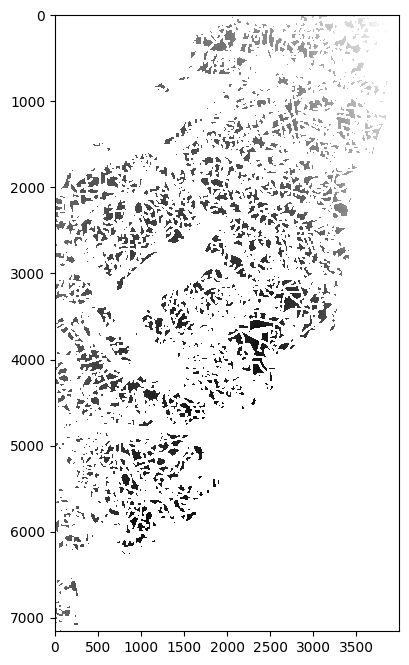

<Axes: >

In [40]:
plt.rcParams['figure.figsize'] = [10, 8]
plot.show(image_read_masked, cmap="gist_gray")

#Figure One

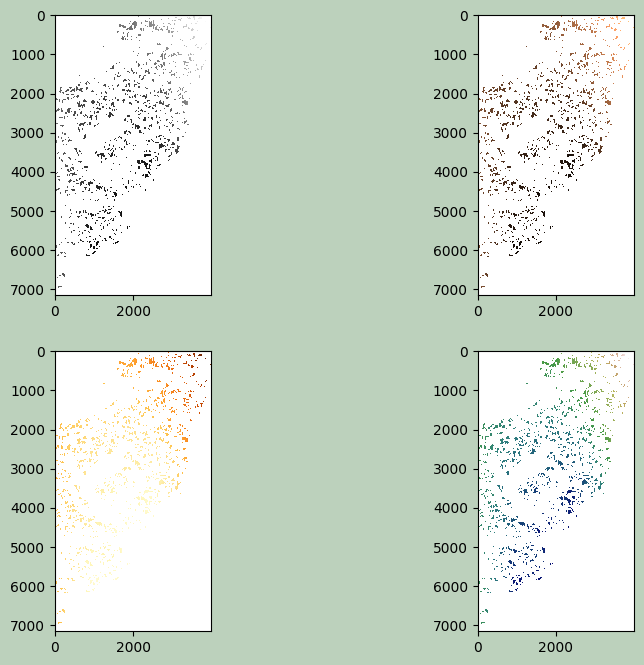

In [41]:
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(image_read_masked, cmap="gist_gray")
ax[0,1].imshow(image_read_masked, cmap="copper")
ax[1,0].imshow(image_read_masked, cmap="YlOrBr")
ax[1,1].imshow(image_read_masked, cmap="gist_earth")
fig.patch.set_facecolor('#bcd1bc')

#Figure Two

In [42]:
raster_path = "/content/drive/MyDrive/Colab Notebooks/IRP/MCE4.tif"
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)

In [43]:
from matplotlib.colors import ListedColormap

custom_cmap = plt.cm.viridis

colors = ['#440154', '#31688e', '#35b779', '#fde725']
custom_cmap = ListedColormap(colors)

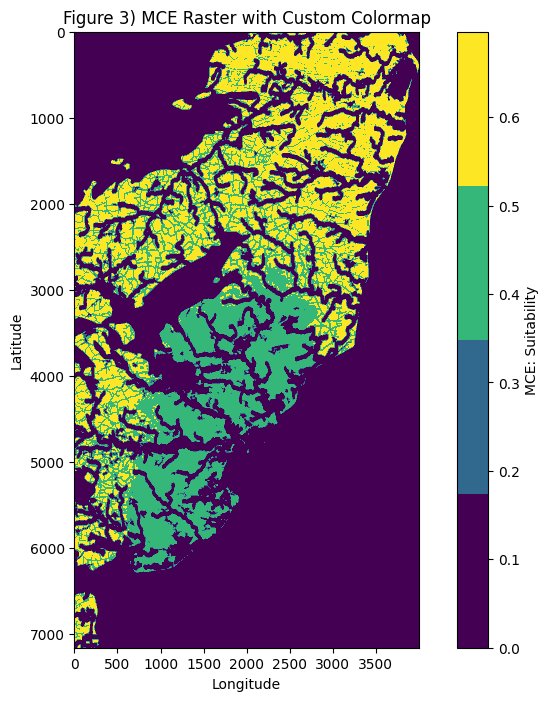

In [44]:
plt.figure(figsize=(10, 8))
plt.imshow(raster_data, cmap=custom_cmap)
plt.colorbar(label="MCE: Suitability")
plt.title("Figure 3) MCE Raster with Custom Colormap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#Figure 3

In [45]:
Hydro = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/IRP/FinalProject/Hydrogeology_clipped2.gpkg')
Hydro.head()

,OBJECTID,ROCK_UNIT,CLASS,CHARACTER,FLOW_MECHA,SUMMARY,VERSION,RASTERID,geometry
0,533.0,NEOGENE ROCKS (UNDIFFERENTIATED),1B,Moderately productive aquifer,Significant intergranular flow,Shelly sands aquifer with indurated bands tota...,HydrogeologyUK_IoM_v5,1,"MULTIPOLYGON (((630419.751 243662.396, 630255...."
1,1012.0,NEOGENE TO QUATERNARY ROCKS (UNDIFFERENTIATED),1B,Moderately productive aquifer,Significant intergranular flow,"Fine-grained, largely unconsolidated sands and...",HydrogeologyUK_IoM_v5,1,"MULTIPOLYGON (((621980.094 228765.243, 621855...."
2,1107.0,NEOGENE TO QUATERNARY ROCKS (UNDIFFERENTIATED),1B,Moderately productive aquifer,Significant intergranular flow,"Fine-grained, largely unconsolidated sands and...",HydrogeologyUK_IoM_v5,1,"MULTIPOLYGON (((622837.373 230033.061, 622740...."
3,1323.0,NEOGENE TO QUATERNARY ROCKS (UNDIFFERENTIATED),1B,Moderately productive aquifer,Significant intergranular flow,"Fine-grained, largely unconsolidated sands and...",HydrogeologyUK_IoM_v5,1,"MULTIPOLYGON (((615650.607 247021.844, 615473...."
4,1397.0,NEOGENE TO QUATERNARY ROCKS (UNDIFFERENTIATED),1B,Moderately productive aquifer,Significant intergranular flow,"Fine-grained, largely unconsolidated sands and...",HydrogeologyUK_IoM_v5,1,"MULTIPOLYGON (((618193.928 246361.868, 618016...."


<Axes: >

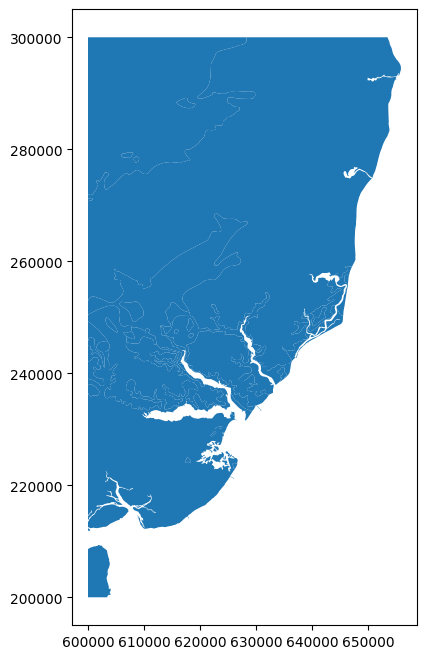

In [46]:
Hydro.plot()

#Figure 4

In [47]:
print(Hydro.head())

   OBJECTID                                       ROCK_UNIT CLASS  \
0     533.0                NEOGENE ROCKS (UNDIFFERENTIATED)    1B   
1    1012.0  NEOGENE TO QUATERNARY ROCKS (UNDIFFERENTIATED)    1B   
2    1107.0  NEOGENE TO QUATERNARY ROCKS (UNDIFFERENTIATED)    1B   
3    1323.0  NEOGENE TO QUATERNARY ROCKS (UNDIFFERENTIATED)    1B   
4    1397.0  NEOGENE TO QUATERNARY ROCKS (UNDIFFERENTIATED)    1B   

                       CHARACTER                      FLOW_MECHA  \
0  Moderately productive aquifer  Significant intergranular flow   
1  Moderately productive aquifer  Significant intergranular flow   
2  Moderately productive aquifer  Significant intergranular flow   
3  Moderately productive aquifer  Significant intergranular flow   
4  Moderately productive aquifer  Significant intergranular flow   

                                             SUMMARY                VERSION  \
0  Shelly sands aquifer with indurated bands tota...  HydrogeologyUK_IoM_v5   
1  Fine-grained, l

In [48]:
print(Hydro.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    74 non-null     float64 
 1   ROCK_UNIT   74 non-null     object  
 2   CLASS       74 non-null     object  
 3   CHARACTER   74 non-null     object  
 4   FLOW_MECHA  38 non-null     object  
 5   SUMMARY     74 non-null     object  
 6   VERSION     74 non-null     object  
 7   RASTERID    74 non-null     int32   
 8   geometry    74 non-null     geometry
dtypes: float64(1), geometry(1), int32(1), object(6)
memory usage: 5.0+ KB
None


In [49]:
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/IRP/FinalProject/watercourse_distance.tif') as src:
  distancerivers = src.read()
  distancerivers = distancerivers.squeeze()

In [50]:
distancerivers.shape

(4000, 4000)

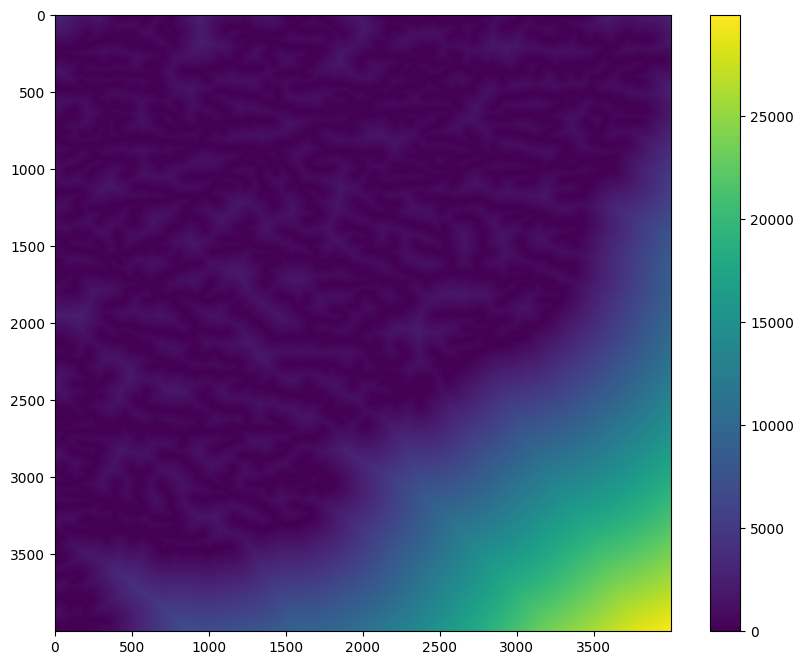

In [51]:
plt.imshow(distancerivers, cmap="viridis")
plt.colorbar()
plt.show()

#Figure 5

In [52]:
with rasterio.open('/content/drive/MyDrive/Colab Notebooks/IRP/FinalProject/3hydrogeology_constraint.tif') as src:
  hydrogeology = src.read()
  hydrogeology = hydrogeology.squeeze()

In [53]:
hydrogeology.shape

(4000, 4000)

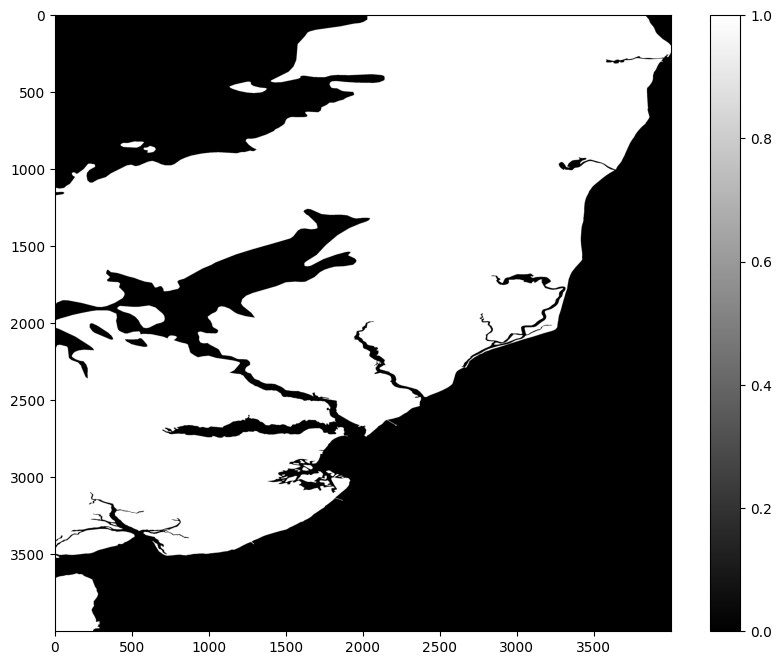

In [54]:
plt.imshow(hydrogeology, cmap="gist_gray", vmin=0, vmax=1)
plt.colorbar()
plt.show()

#Figure 6

Overall, the results of the scripting of Python to explore and present the MCE generated by QGIS, in different colour maps, as well as the geopackage file of hydrogeology in the study area, proximity to rivers raster calculated in the study’s analysis as well as the shape of the hydrogeology constraint raster, indicate that the least suitable part of the East Suffolk Coast

## Discussion

Past studies, such as the 2006 one by Pye and Blott which examined coastal and morphological change in the Dunwich-Sizewell Area in Suffolk (see references) utilised GIS photography and LiDAR data modelling in order to track how the coast had eroded over time, and at what pace. Overall, the findings were that the Suffolk coast has experienced significant shoreline recession and recession of its cliffs and headlands (Pye and Blott, 2006). This same coastal area was also highlighted in this study’s final MCE as one prone to erosion and flooding, as seen in Figure 3. Although, the study also found that the shoreline near Sizewell, where Sizewell B is currently located and Sizewell C is to be built, has remained relatively stable for the past 50 years (Pye and Blott, 2006). In O’Riordan’s 1984 study of how Sizewell B meets the need of public energy policy’s requirements for increased electricity generation capacity whilst also exposing that despite validating its own economic case it has raised many concerns despite being less damaging than energy generated by coal. This study examined the relationship between the proposal for Sizewell B and the UK Government’s energy policies. The study, however, was limited in uncovering the long-term economic viability of the plant as well as long-term risks produced from the nuclear waste disposal and potential accidents (O’Riordan, 1984) – some of these limitations may be due to the study’s time of inception. In a later study, (O’Riordan et al., 1998a) analysing environmental appraisal procedures, it was discovered that there is valid concern for Sizewell C affecting nature conservation interests along the Suffolk coast, especially for the Sizewell Marshes. It outlined that further research and modelling would be needed to assess flood risk and coastal processes long term (O’Riordan, 1988a).
The methodologies utilised in this analysis are advantageous in the sense that they provide an advanced analysis of how multiple factors influence the suitability of locations for the nuclear power station, high customizability of the multi-criterion evaluation calculation and easy reproducibility in other colour scales. However, analysis could have been aided by more specific data on where the most vulnerable freshwater or saltwater ecosystems are along the coast to add more layers to the multi-criterion evaluation. Overall, the main limit to analysis was limit to depth in analysis and data availability.


## Conclusion

In conclusion, the most suitable area for building Sizewell C may not be exactly next to Sizewell B, as proposed – since, despite it fitting the factors of the suitability index, it falls within 200 metres of a local river and may be at risk of flooding. The most suitable area for construction appears to be the northeast part of the coast, where there is less coastal erosion and densely concentrated river structures. This research should aid both environmental groups, local government and bodies and local communities in their evaluation of the power station in order to reach a conclusion that benefits the community, meets the energy needs of the UK and the local community as well as prioritises long term environmental security and sustainability.

## References

E.D.F. Energy, 2019. RSPB Response to the Sizewell C Stage 3 Public Consultation.
Guimarães, L.S.F., de Carvalho-Junior, L., Façanha, G.L., Resende, N. da S., Neves, L.M. and Cardoso, S.J. (2023). Meta-analysis of the thermal pollution caused by coastal nuclear power plants and its effects on marine biodiversity. Marine Pollution Bulletin, [online] 195, p.115452.
Lees, B.J., 1982. Quaternary sedimentation in the Sizewell-Dunwich banks area, Suffolk. Bulletin of the Geological Society of Norfolk, 32, pp.1-35.
McMenemy, R., Prickett, K., and Fullbrook, D., 2024. Sizewell opponents apply to Supreme Court as government commits £1bn. BBC.[online] Available at: https://www.bbc.co.uk/news/uk-england-suffolk-68056919#:~:text=Anti%2Dnuclear%20campaign%20groups%20Together,sea%20defences%20necessary%20to%20keep
Ordnance Survey. (2024) OS Data Hub. Available at: https://osdatahub.os.uk/ (Accessed: 7 December 2024).
O'Riordan, T., 1984. The Sizewell B inquiry and a national energy strategy. The Geographical Journal, 150(2), pp.171-182.
O'Riordan, T., Kemp, R. and Purdue, M., 1988a. Sizewell B and environmental assessment. Project Appraisal, 3(2), pp.89-94.
O’Riordan, T., Kemp, R. and Purdue, M., 1988b. The Suffolk Dimension. Sizewell B: An Anatomy of Inquiry, pp.260-298.
Pye, K. and Blott, S.J., 2006. Coastal processes and morphological change in the Dunwich-Sizewell area, Suffolk, UK. Journal of Coastal Research, 22(3), pp.453-473.
Sizewell C., 2024. Sizewell C: Proposals for a new nuclear power station. [online] Available at: https://www.sizewellc.com/proposals/.
